In [1]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [2]:
path = '/content/drive/MyDrive/Doutorado/Artigos/inflacao-twitter/data/'
all_files = ['20211114_215852.csv',
             '20211115_105535.csv']

In [3]:
data_file = []
dateparser = lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.000Z')

for filename in all_files:
  file_read = path + filename
  df = pd.read_csv(file_read, skiprows=[1], date_parser=dateparser)
  data_file.append(df)

dataframe = pd.concat(data_file, axis=0, ignore_index=True)
dataframe.drop_duplicates(subset=['id'], inplace=True)
dataframe.reset_index(inplace=True, drop=True)
dataframe['created_at'] = pd.to_datetime(dataframe['created_at'], errors='coerce')

In [4]:
output_path = '/content/drive/MyDrive/Doutorado/Artigos/inflacao-twitter/output/' 
file_write = output_path + 'data_query3.csv'
dataframe.to_csv(file_write)

In [5]:
print('-------------- Summary -----------------')
print('No. tweets:', len(dataframe))
print('No. dias com tweets:', dataframe['created_at'].dt.date.nunique())
print('First day:', dataframe['created_at'].dt.date.min().strftime('%Y-%m-%d'))
print('Last day:', dataframe['created_at'].dt.date.max().strftime('%Y-%m-%d'))
print('Qty. unique geolocations:', dataframe['geo'].nunique())
print('----------------------------------------')

-------------- Summary -----------------
No. tweets: 60292
No. dias com tweets: 3886
First day: 2010-10-12
Last day: 2021-09-30
Qty. unique geolocations: 2066
----------------------------------------


In [6]:
twt_pday = pd.DataFrame(dataframe['created_at'].dt.date.value_counts()).sort_index()
twt_pday.index = pd.to_datetime(twt_pday.index)
twt_pday.columns = ['per_day']

twt_pday.sort_values(by='per_day', ascending=False)[:10]

,per_day
2014-10-03,885
2014-10-25,518
2014-10-20,447
2014-10-15,368
2014-10-26,354
2014-10-16,274
2014-10-09,246
2021-09-07,244
2021-09-09,243
2016-01-08,218


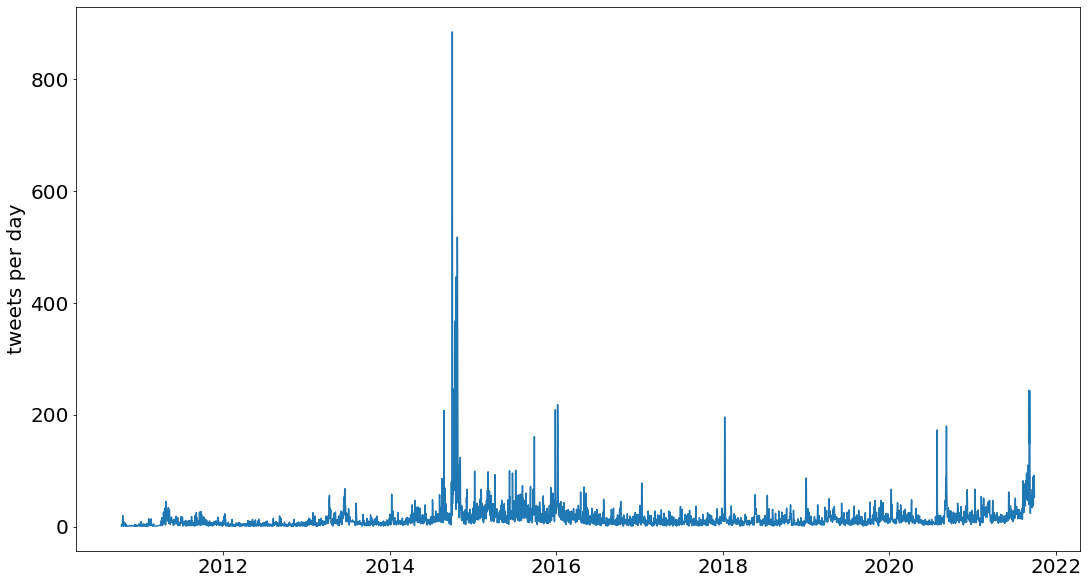

In [7]:
plt.figure(figsize=(18, 10))
plt.plot(twt_pday)
plt.ylabel('tweets per day', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.savefig('/content/drive/MyDrive/Doutorado/Artigos/inflacao-twitter/output/tweets.tif')
plt.show()

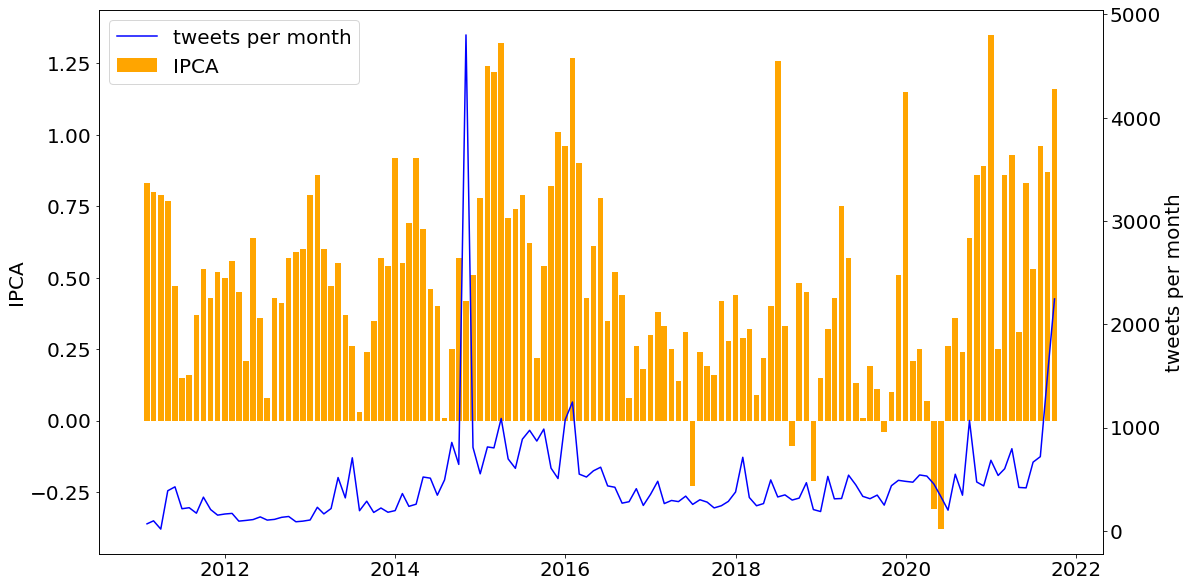

In [8]:
twt_pmonth = twt_pday[twt_pday.index >= '2011-01-01'].resample('M').sum()
twt_pmonth.columns = ['per_month']

ipca_file = output_path + 'ipca.csv'
ipca = pd.read_csv(ipca_file, index_col=0)
ipca.index = pd.to_datetime(ipca.index, errors='coerce')
ipca = ipca.loc[ipca.index >= '2011-01-01']
ipca = ipca.resample('M').sum()

fig, ax1 = plt.subplots(figsize=(18, 10))
ax1.bar(ipca.index, ipca['IPCA'], label='IPCA', color='orange', width=24)
ax1.plot([], label='tweets per month', color ='b')
ax1.set_ylabel('IPCA', fontsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.tick_params(axis='x', labelsize=20)
plt.legend(fontsize=20, loc='upper left')
ax2 = ax1.twinx()
ax2.plot(twt_pmonth['per_month'], color ='b')
ax2.set_ylabel('tweets per month', fontsize=20)
ax2.tick_params(axis='y', labelsize=20)
plt.savefig('/content/drive/MyDrive/Doutorado/Artigos/inflacao-twitter/output/tweets_ipca.tif')
plt.show()

In [9]:
pearson = pearsonr(ipca['IPCA'].values, twt_pmonth['per_month'].values)[0]
print('Pearson Correlation Coefficient: {:.4f}'.format(pearson))

Pearson Correlation Coefficient: 0.2433


In [10]:
ipca[(ipca.index >= pd.to_datetime('2014')) & (ipca.index <= pd.to_datetime('2015'))]
ipca.index[ipca['IPCA'] == max(ipca['IPCA'])]

DatetimeIndex(['2020-12-31'], dtype='datetime64[ns]', freq='M')